Test manager of root functionality

In [1]:

import sys
from pathlib import Path
import seaborn as sns

In [2]:

LCL_PATH  = str(Path().cwd().parent.parent)
ROOT_PATH = str(Path(LCL_PATH).parent.parent)
EXTERN_CMD_PATH = str(Path(ROOT_PATH))
GENERIC_PATH    = str(Path(ROOT_PATH)/"GeneticAlgorithmManager")
SPECIFIC_PATH   = str(Path(ROOT_PATH)/"extension")
print("""
root path:\t{}
local path:\t{}
generic_path:\t{}
project_specific_path:\t{}
extern_cmd_path: \t{}""".format(ROOT_PATH, LCL_PATH, GENERIC_PATH, SPECIFIC_PATH, EXTERN_CMD_PATH))


root path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura
local path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura/laborator_1/TTP
generic_path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura/GeneticAlgorithmManager
project_specific_path:	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura/extension
extern_cmd_path: 	/home/gheorghe/Desktop/Proiecte/master/MIN_metode_inspirate_din_natura


In [3]:

# adding local_folder to the system path
sys.path.append(LCL_PATH)
sys.path.append(ROOT_PATH)
sys.path.append(GENERIC_PATH)
sys.path.append(SPECIFIC_PATH)

from sys_function import * # este in root

In [4]:

sys_remove_modules("imshow")
sys_remove_modules("algoritm_genetic") # facem update doar daca modificam ceva in generic
sys_remove_modules("genoms") # 
sys_remove_modules("builds.fitness.fitness_ttp_v1")
sys_remove_modules("builds.dataset_utils.dataset_ttp_man")
sys_remove_modules("builds.dataset_utils.ttp_generator")

from imshow import *
from algoritm_genetic import *
from genoms import *
from builds.fitness.fitness_ttp_v1 import *
from builds.dataset_utils.dataset_ttp_man import *
from builds.dataset_utils.ttp_generator import *

# Data aquisition

In [ ]:

ttp_generator = TTPGenerator("{}/data".format(LCL_PATH))
dataset = ttp_generator(nodes_file="NODE_COORD_SECTION.csv",
                        items_file="ITEMS_SECTION.csv")
dataset

In [ ]:
dataset_obj = DatasetTTPMan(dataset)

# InitPopulationTabuSearch

In [ ]:

obj = InitPopulationTabuSearch("init", dataset_man=dataset_obj, city=0, window_size=4, v_min=0.1, v_max=1, W=25936, R=5.61)
obj.setParameters(GENOME_LENGTH=dataset["GENOME_LENGTH"])

## __call__

In [27]:

size = 30
xu0 = np.random.uniform(low=0.0, high=1.0, size=size)
xu1 = np.random.uniform(low=-1.5, high=1.5, size=size)
xn0 = np.random.normal(loc=0.0, scale=1.0, size=size)
xn1 = np.random.normal(loc=1.0, scale=2.0, size=size)
last_u = {"min":xu0.min(),   "max":xu0.max()}
#last_ns = {"mean":xn0.mean(), "std":xn0.std()}
#last_nn = {"min":xn0.min(),   "max":xn0.max()}

last_ns = {"mean":1, "std":2}
last_nn = {"min":-10,   "max":10}

In [48]:
def norm(x):
    x_min = x.min()
    x_max = x.max()
    return (x-x_min)/(x_max-x_min)

def norm_max(x):
    x_min = x.min()
    x_max = x.max()
    return (x_max-x)/(x_max-x_min)
    
def standardization(x):
    x_mean = x.mean()
    x_std  = x.std()
    return (x-x_mean)/x_std
    
def standardization_mean(x):
    x_mean = x.mean()
    return x/x_mean

def norm_reference(x, x_min, x_max):
    return (x-x_min)/(x_max-x_min)

def standardization_reference(x, x_mean, x_std):
    return (x-x_mean)/x_std


## Uniform

<Axes: >

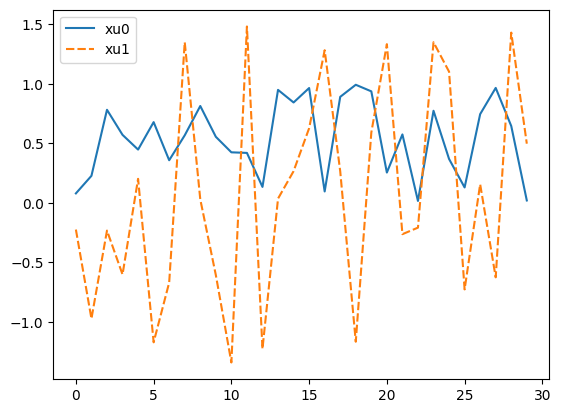

In [39]:

data = {"xu0":xu0, "xu1":xu1}
sns.lineplot(data)

<Axes: >

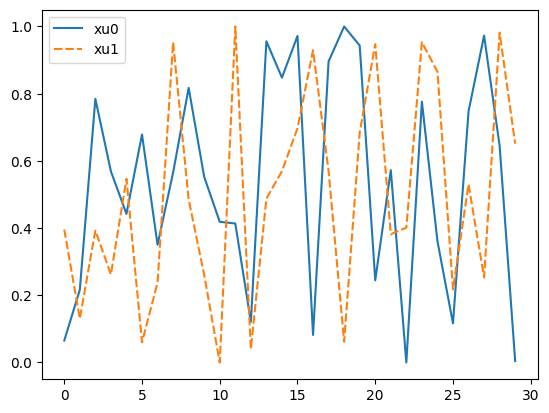

In [40]:

data = {"xu0":norm(xu0), "xu1":norm(xu1)}
sns.lineplot(data)

<Axes: >

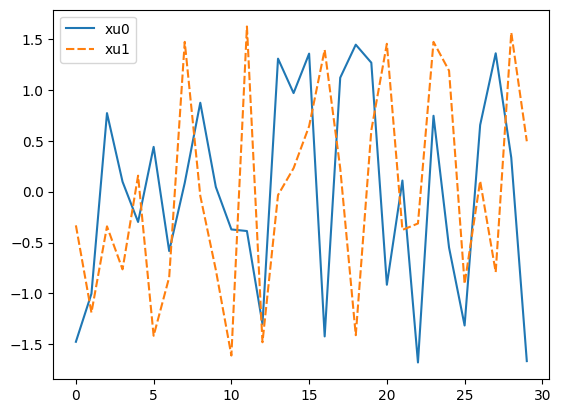

In [41]:

data = {"xu0":standardization(xu0), "xu1":standardization(xu1)}
sns.lineplot(data)

<Axes: >

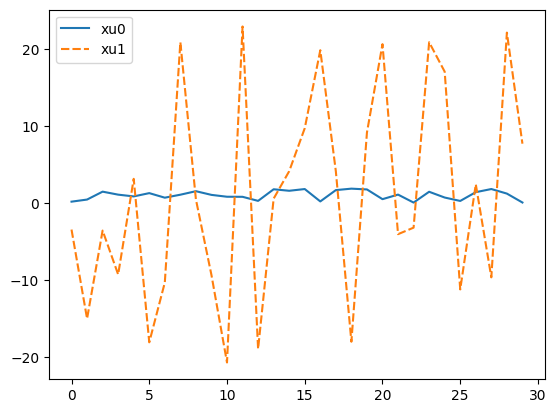

In [42]:

data = {"xu0":standardization_mean(xu0), "xu1":standardization_mean(xu1)}
sns.lineplot(data)

## Normal

<Axes: >

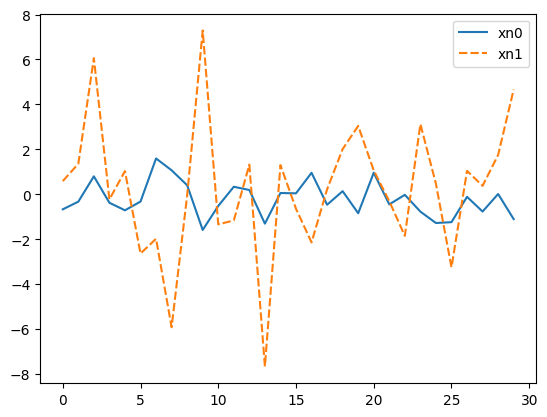

In [35]:

data = {"xn0":xn0, "xn1":xn1}
sns.lineplot(data)

<Axes: >

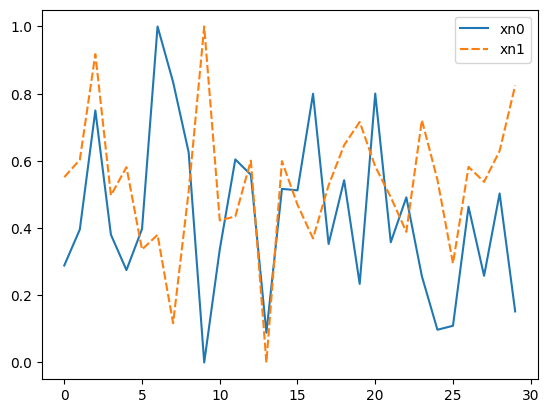

In [36]:

data = {"xn0":norm(xn0), "xn1":norm(xn1)}
sns.lineplot(data)

<Axes: >

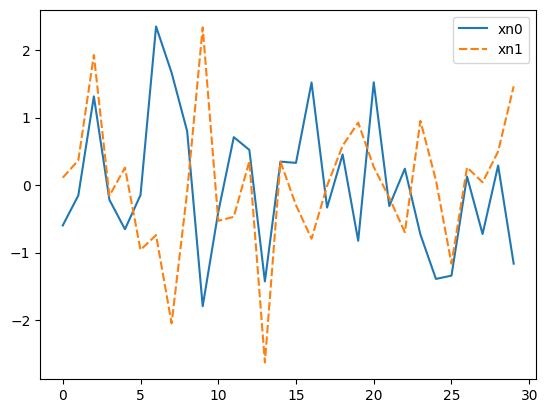

In [37]:

data = {"xn0":standardization(xn0), "xn1":standardization(xn1)}
sns.lineplot(data)

<Axes: >

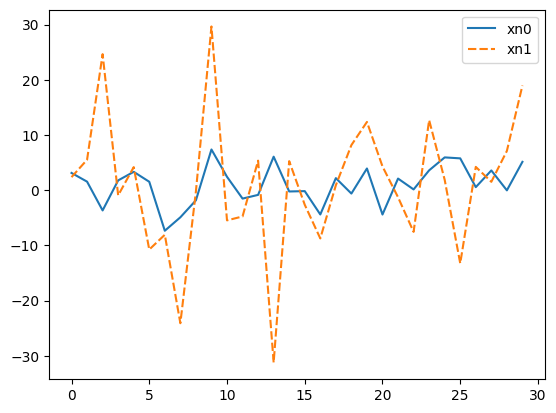

In [38]:

data = {"xn0":standardization_mean(xn0), "xn1":standardization_mean(xn1)}
sns.lineplot(data)

## Normal reference

<Axes: >

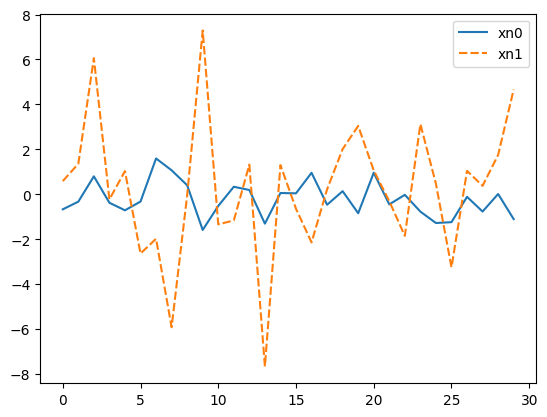

In [28]:

xn1 = np.random.normal(loc=0.0, scale=3.0, size=size)
data = {"xn0":xn0, "xn1":xn1}
sns.lineplot(data)

<Axes: >

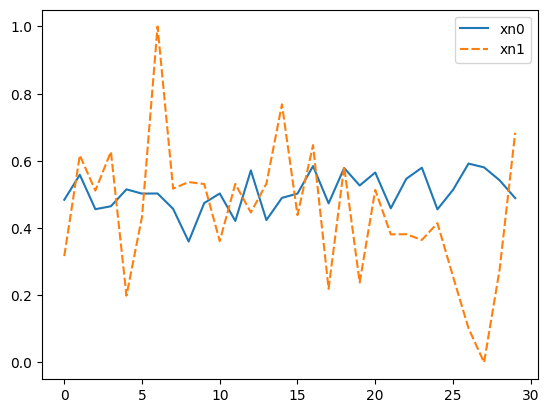

In [24]:

tmp = np.concatenate((xn0, xn1), axis=None)
x_min, x_max = tmp.min(), tmp.max()
data = {"xn0":reference(xn0, x_min, x_max), "xn1":reference(xn1, x_min, x_max)}
sns.lineplot(data)

mean -0.21631558258522132, std 0.7682747195375997
mean 0.24582876472259851, std 3.0132886835933483
mean 0.014756591068688596, std 1.1225069820278744
mean 0.014756591068688592, std 2.2109888550404997


<Axes: >

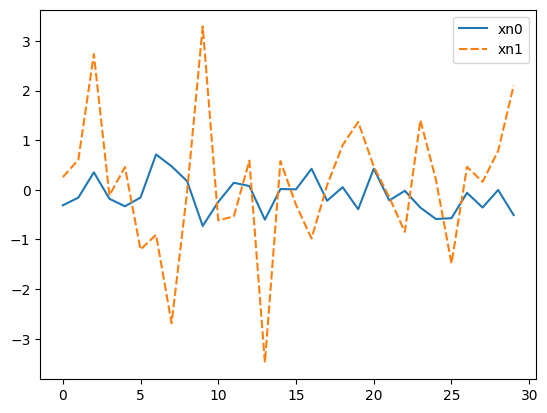

In [33]:

x_mean0, x_std0 = xn0.mean(), xn0.std()
print("mean {}, std {}".format(x_mean0, x_std0))
x_mean1, x_std1 = xn1.mean(), xn1.std()
print("mean {}, std {}".format(x_mean1, x_std1))
print("mean {}, std {}".format((x_mean0+x_mean1)/2, np.array([x_std1, x_std0]).std()))
tmp = np.concatenate((xn0, xn1), axis=None)
x_mean, x_std = tmp.mean(), tmp.std()
print("mean {}, std {}".format(x_mean, x_std))
data = {"xn0":standardization_static(xn0, x_mean, x_std), "xn1":standardization_static(xn1, x_mean, x_std)}
sns.lineplot(data)

## Uniform reference

<Axes: >

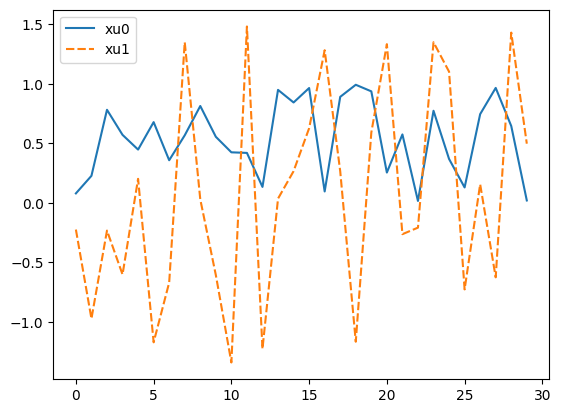

In [44]:

#xu1 = np.random.uniform(low=-1.5, high=1.5, size=size)
data = {"xu0":xu0, "xu1":xu1}
sns.lineplot(data)

<Axes: >

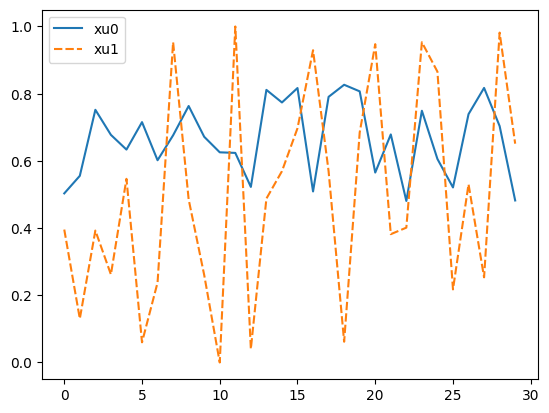

In [53]:

tmp = np.concatenate((xu0, xu1), axis=None)
x_min, x_max = tmp.min(), tmp.max()
data = {"xu0":norm_reference(xu0, x_min, x_max), "xu1":norm_reference(xu1, x_min, x_max)}
sns.lineplot(data)

<Axes: >

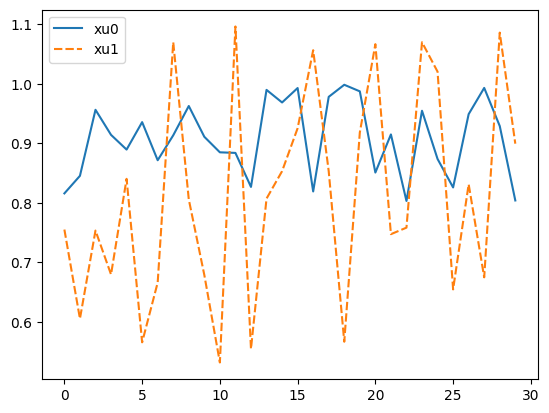

In [56]:

tmp = np.concatenate((xu0, xu1), axis=None)
x_min, x_max = -4, 1
data = {"xu0":norm_reference(xu0, x_min, x_max), "xu1":norm_reference(xu1, x_min, x_max)}
sns.lineplot(data)

<Axes: >

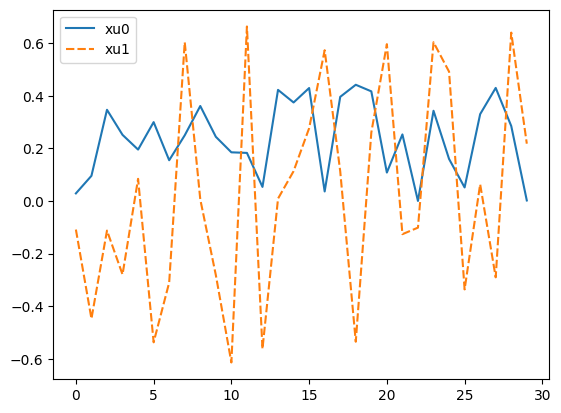

In [51]:

tmp = np.concatenate((xn0, xn1), axis=None)
x_mean, x_std = tmp.mean(), tmp.std()
data = {"xu0":standardization_reference(xu0, x_mean, x_std), "xu1":standardization_reference(xu1, x_mean, x_std)}
sns.lineplot(data)